# Normalization (2D samples)

This function have the following cost:
* adds: $2 N + 2 N$
* divs: $2$
* total: $4 N + 2$

So:
$$W = 4 N + 2 \quad flops$$

The memory traffic is:
$$Q = 4 (2 N)$$

And so the operational intensity is for low dimensions ($d=2$):
$$I = \frac{4 N + 2}{4 \cdot 2 N} \approxeq \frac{1}{2} ~ \text{flops/byte}$$
The computation will be **??**.

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from visualization import plot

mpl.rcParams['figure.figsize'] = (8.1, 5)
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['font.family'] = 'Roboto'
mpl.rcParams['font.size'] = 15

Cache sizes and limits taking into account that the working set is:
$$W_{set} = 2 N$$

In [5]:
cache_1 = 32 * 2**10    # 32 KB
cache_2 = 256 * 2**10   # 256 KB
cache_3 = 8 * 2**20.    # 8 MB


N_cache1 = cache_1 / 2
N_cache2 = cache_2 / 2
N_cache3 = cache_3 / 2
print(f"Cache 1 limit size: {N_cache1:.0f}")
print(f"Cache 2 limit size: {N_cache2:.0f}")
print(f"Cache 3 limit size: {N_cache3:.0f}")

Cache 1 limit size: 16384
Cache 2 limit size: 131072
Cache 3 limit size: 4194304


## System Information

CPU: Intel Core i7-6820HQ @ 2.70GHz

Cache:
* L1 Cache: 32 KB
* L2 Cache: 256 KB
* L3 Cache: 8 MB

Compiler:
`g++-4.9 (Homebrew GCC 4.9.4) 4.9.4`

## Benchmark 1

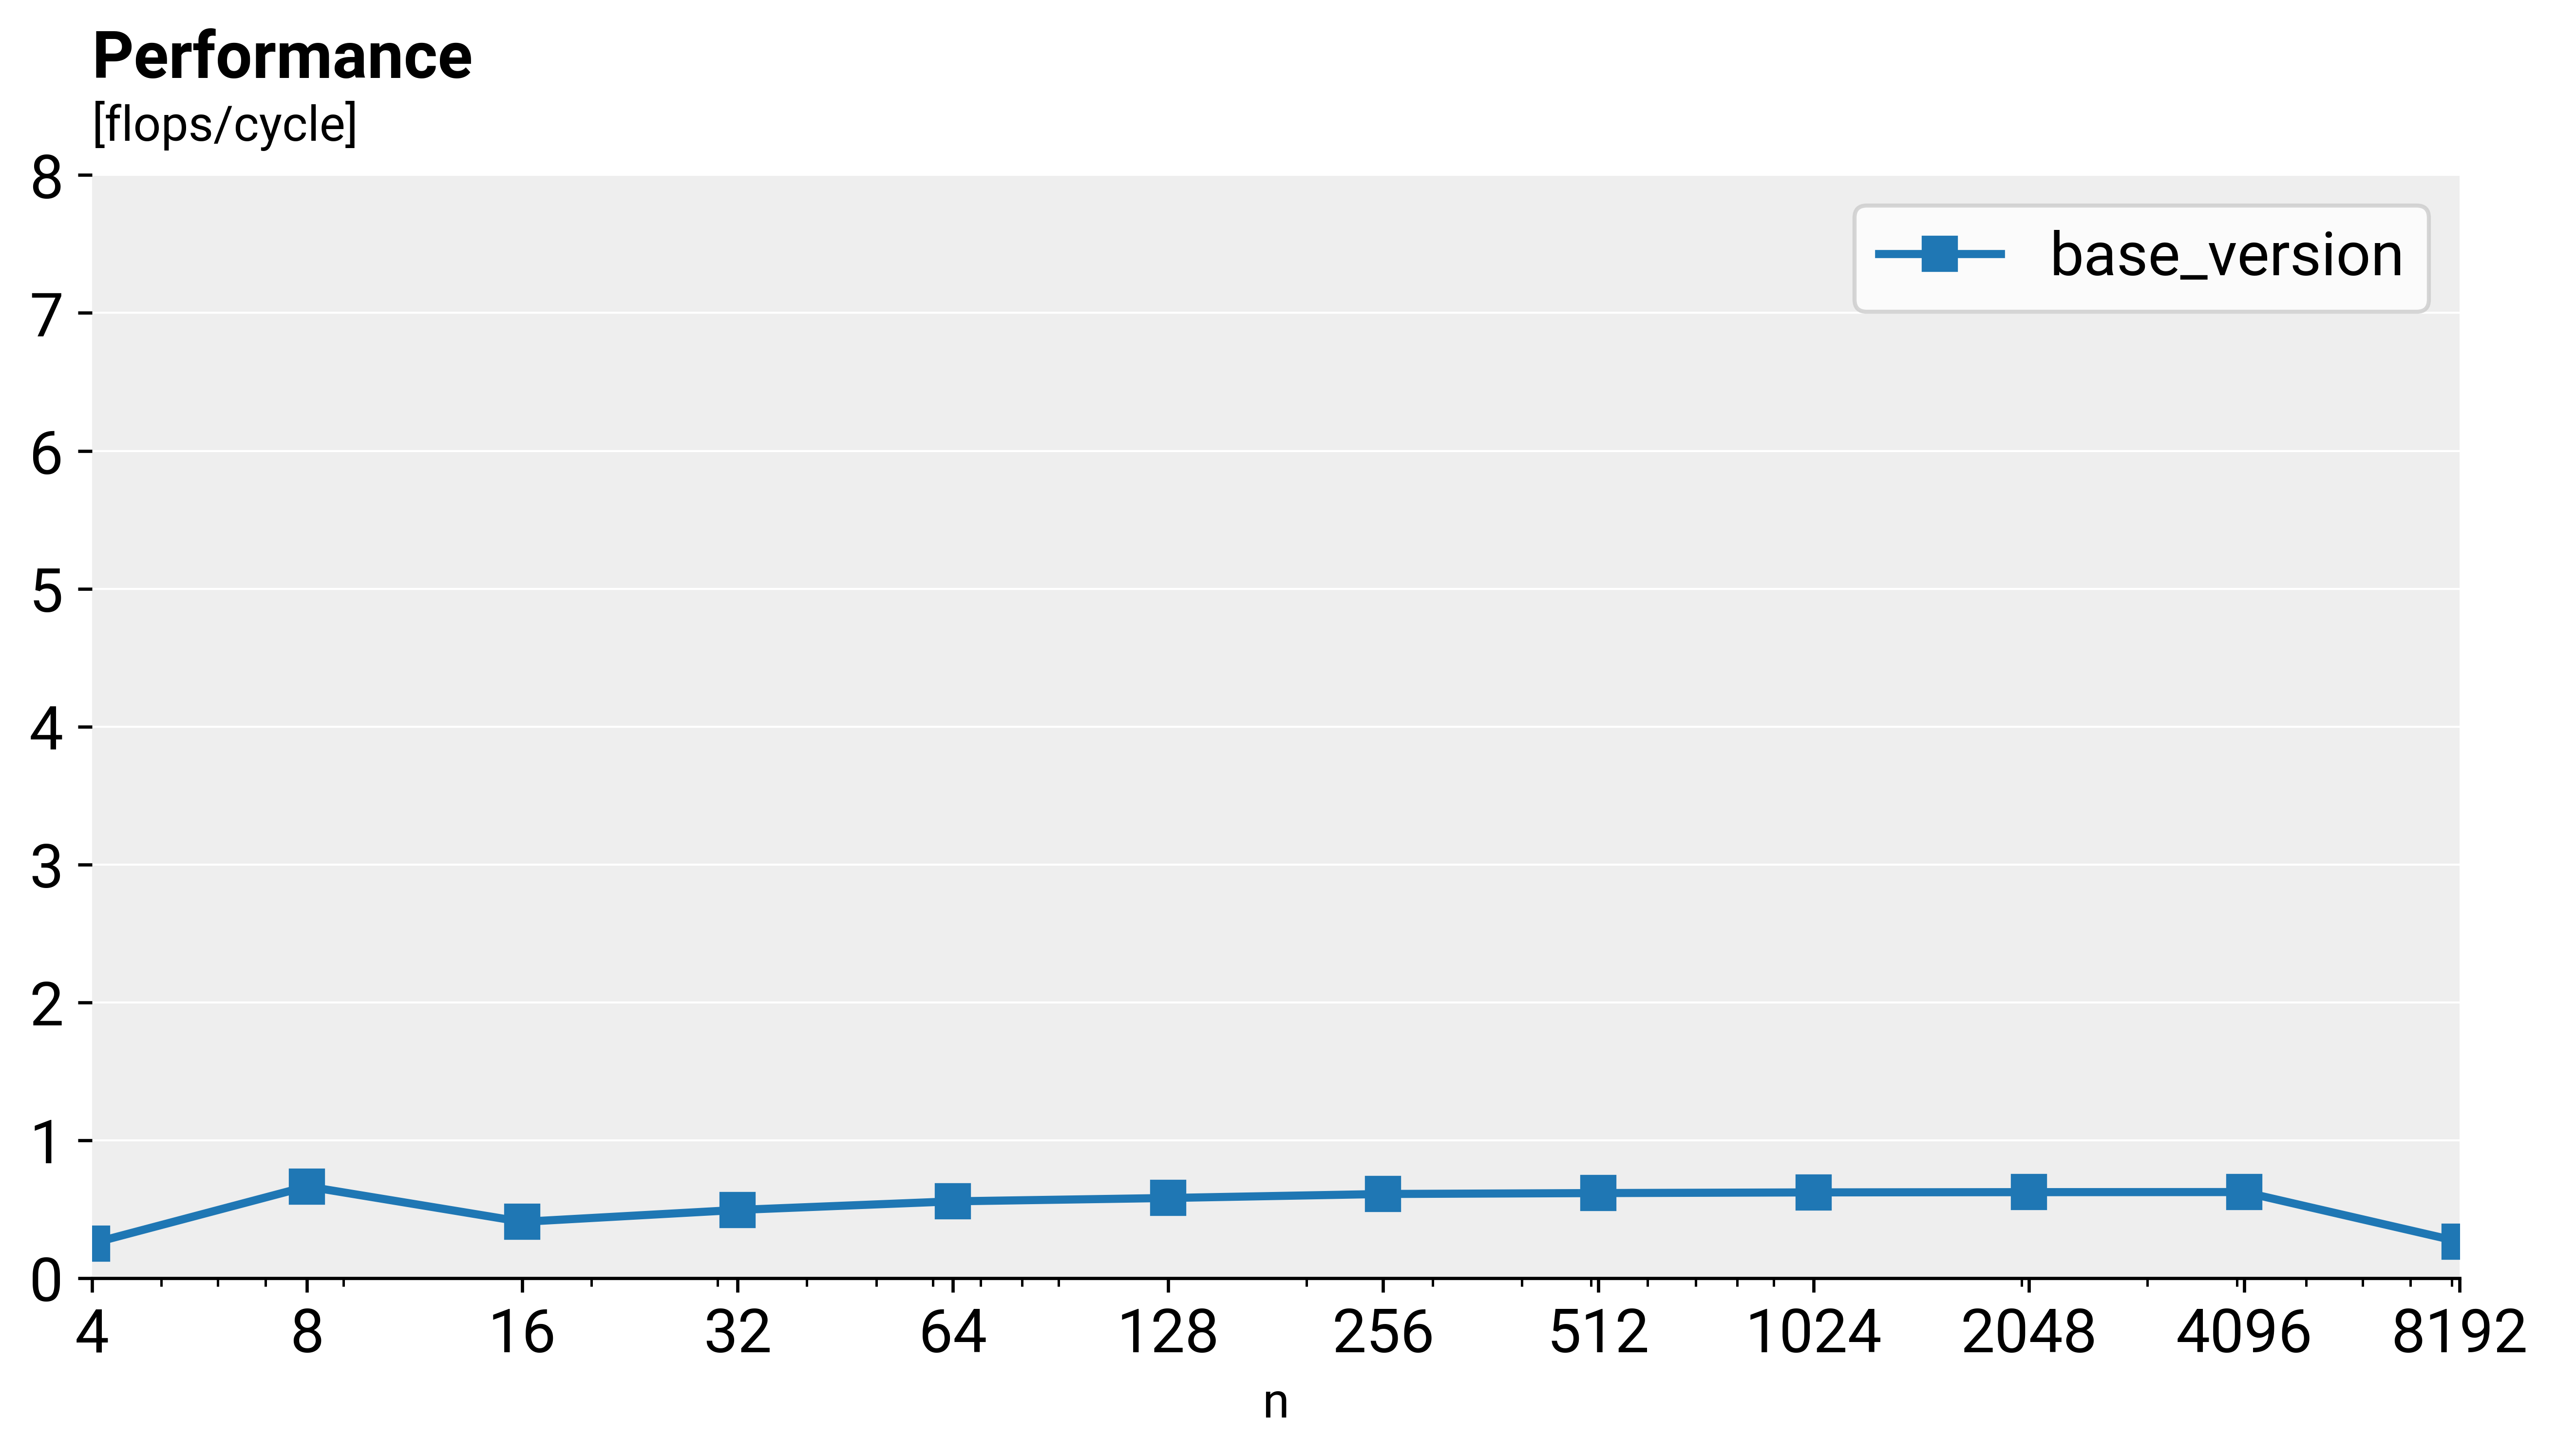

In [6]:
data = pd.read_csv("./bench1.csv")
# Extract the input size
N = data["N"].as_matrix()
# Decompose the data frame into the different functions and compute the performance
func_names = data.columns.values[1:]
perf = []
flops = {
    "base_version": 4 * N + 2,
}

for func in func_names:
    cycles = data[func].as_matrix()
    P = flops[func] / cycles
    perf.append(P)
perf = np.array(perf)

ax = plot(N, perf, labels=func_names, ylim=8, title="Performance")
ax.set_xscale("log")
ax.set_xticks(N)
ax.set_xticklabels(N)
ax.axvline(N_cache1)
ax.axvline(N_cache2)
ax.axvline(N_cache3)
plt.show()

# Benchmark 2

The next step is to unrool the main loops with accumulators. The number of accumulators required are $8$ as the addition latency is $4$ and the gap is $0.5$.

This $8$ accumulators are split into 4 for each dimension.

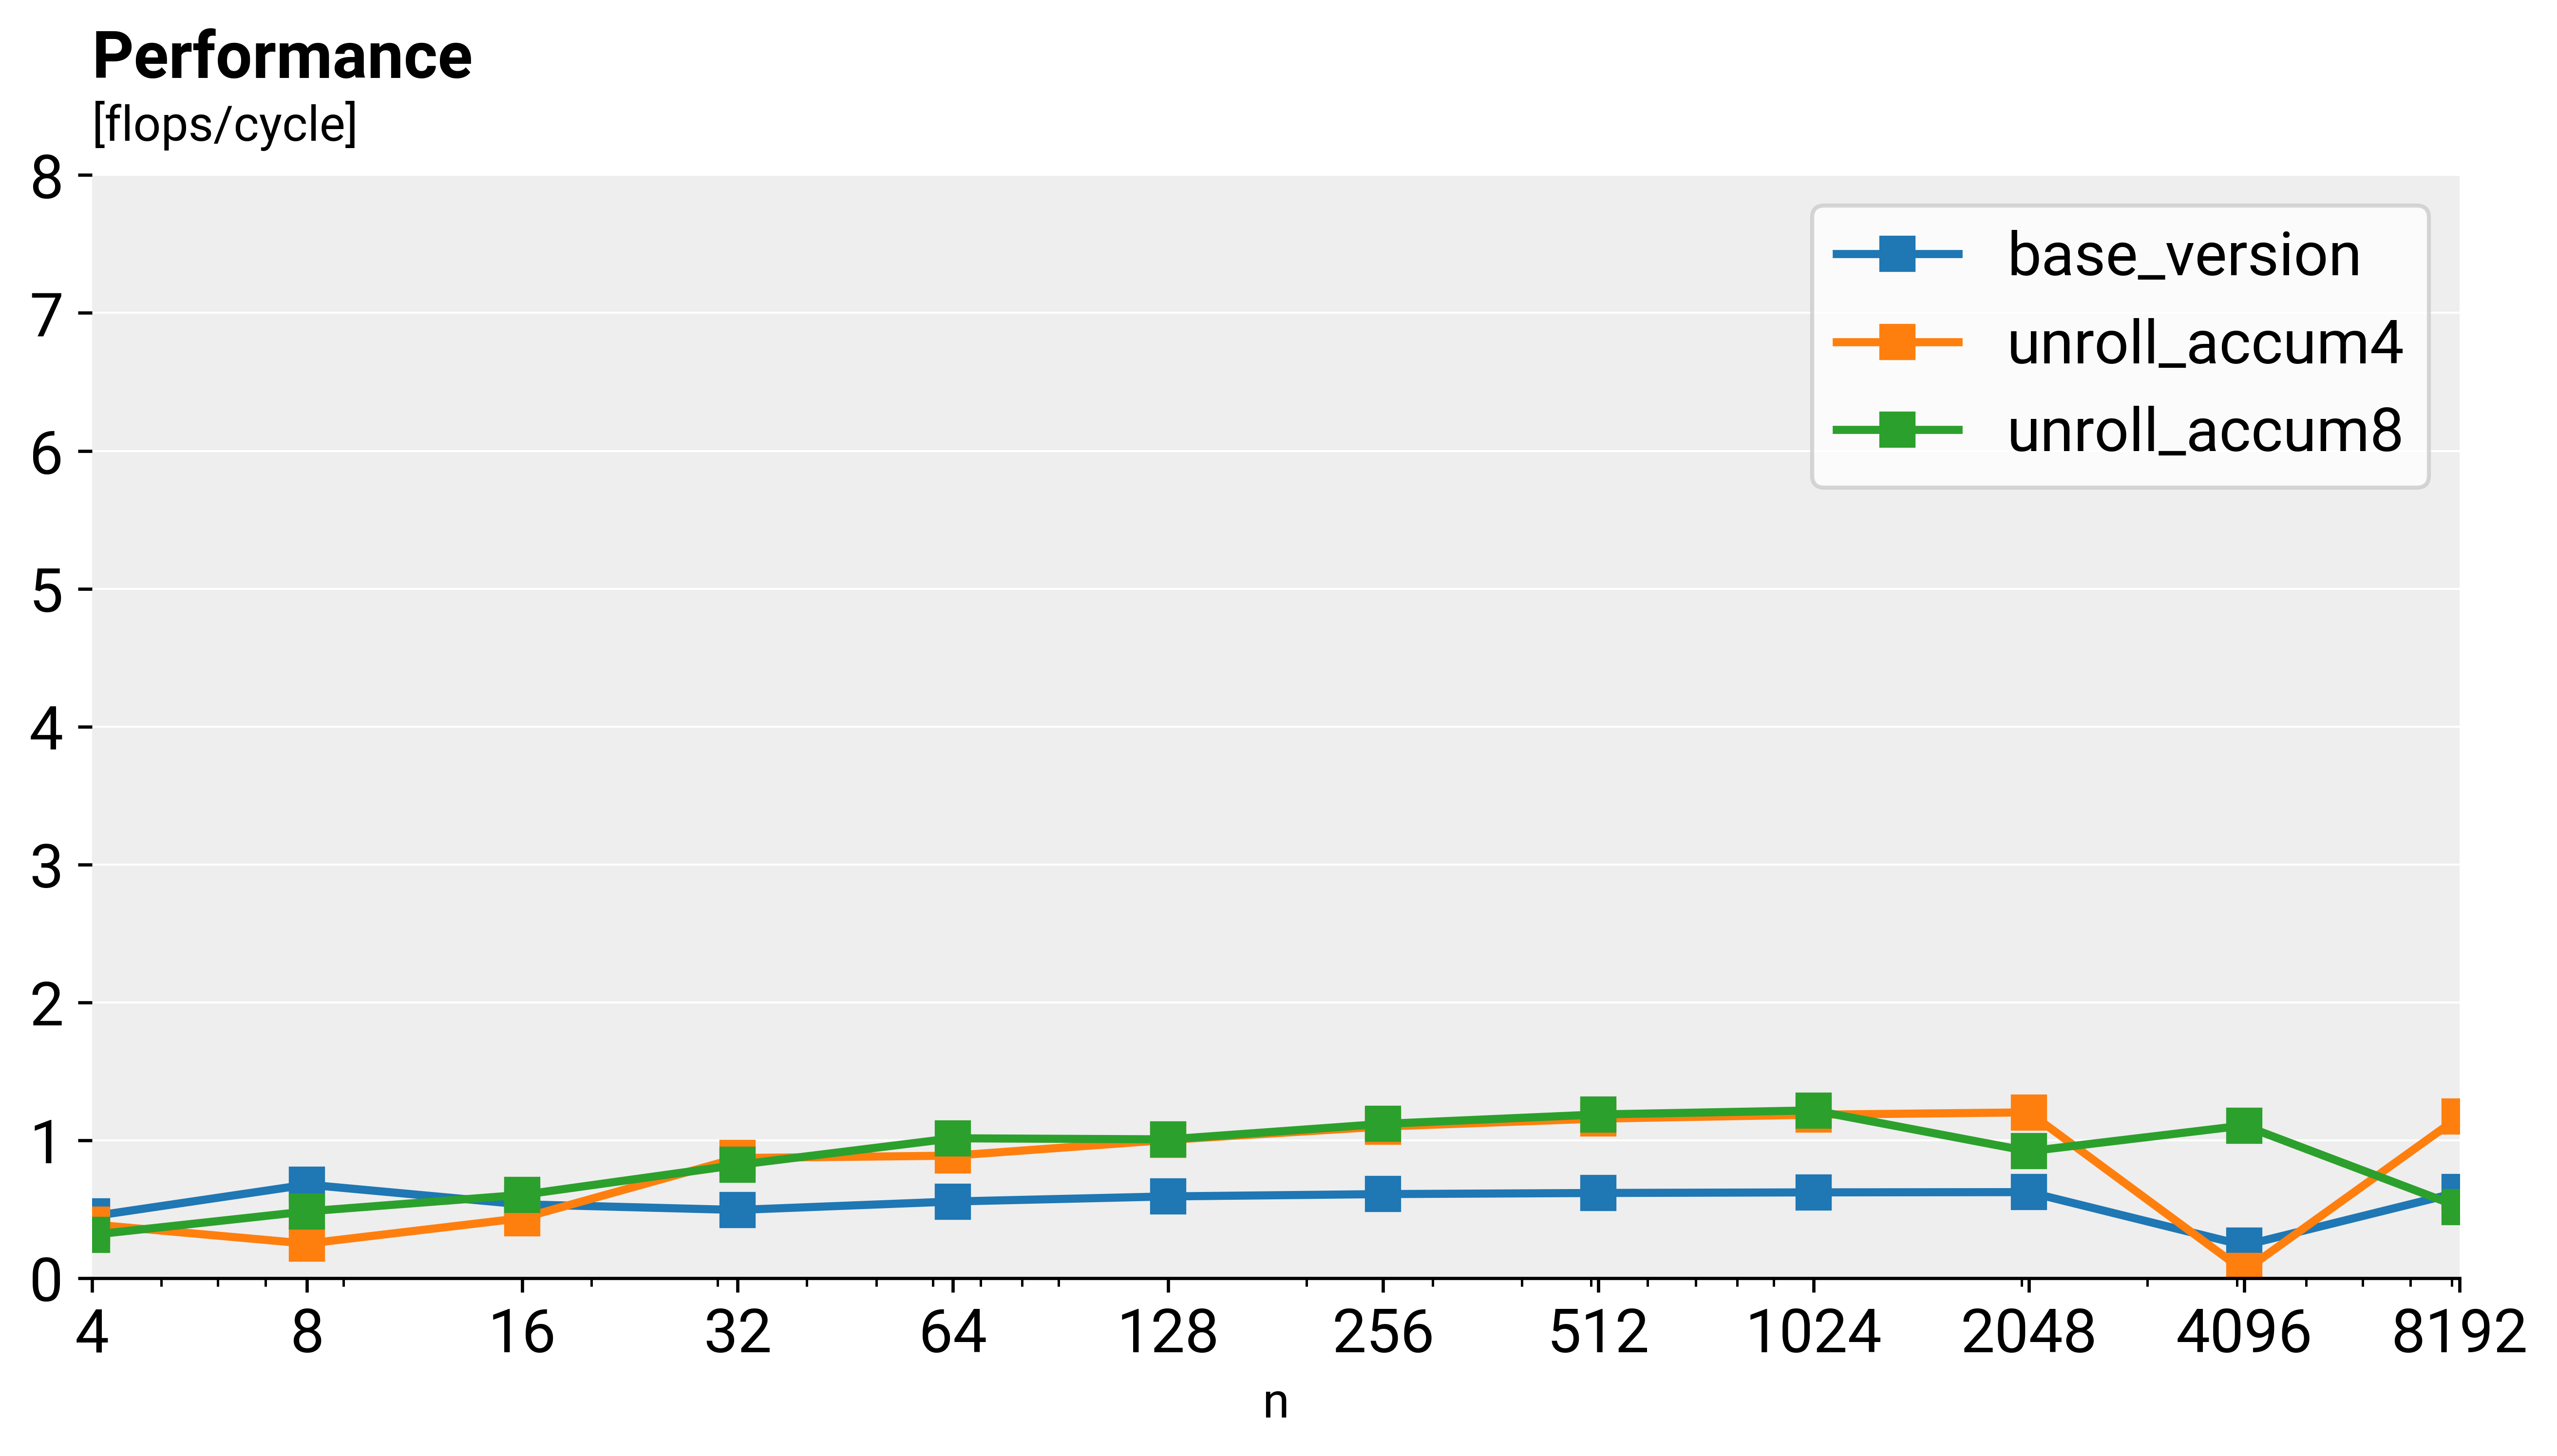

In [11]:
data = pd.read_csv("./bench2.csv")
# Extract the input size
N = data["N"].as_matrix()
# Decompose the data frame into the different functions and compute the performance
func_names = data.columns.values[1:]
perf = []
flops = {
    "base_version": 4 * N + 2,
    "unroll_accum4": 4 * N + 2,
    "unroll_accum8": 4 * N + 2,
}

for func in func_names:
    cycles = data[func].as_matrix()
    P = flops[func] / cycles
    perf.append(P)
perf = np.array(perf)

ax = plot(N, perf, labels=func_names, ylim=8, title="Performance")
ax.set_xscale("log")
ax.set_xticks(N)
ax.set_xticklabels(N)
ax.axvline(N_cache1)
ax.axvline(N_cache2)
ax.axvline(N_cache3)
plt.show()

## Benchmark 3

Here it has been implemented the vectorized version with $8$ accumulators.

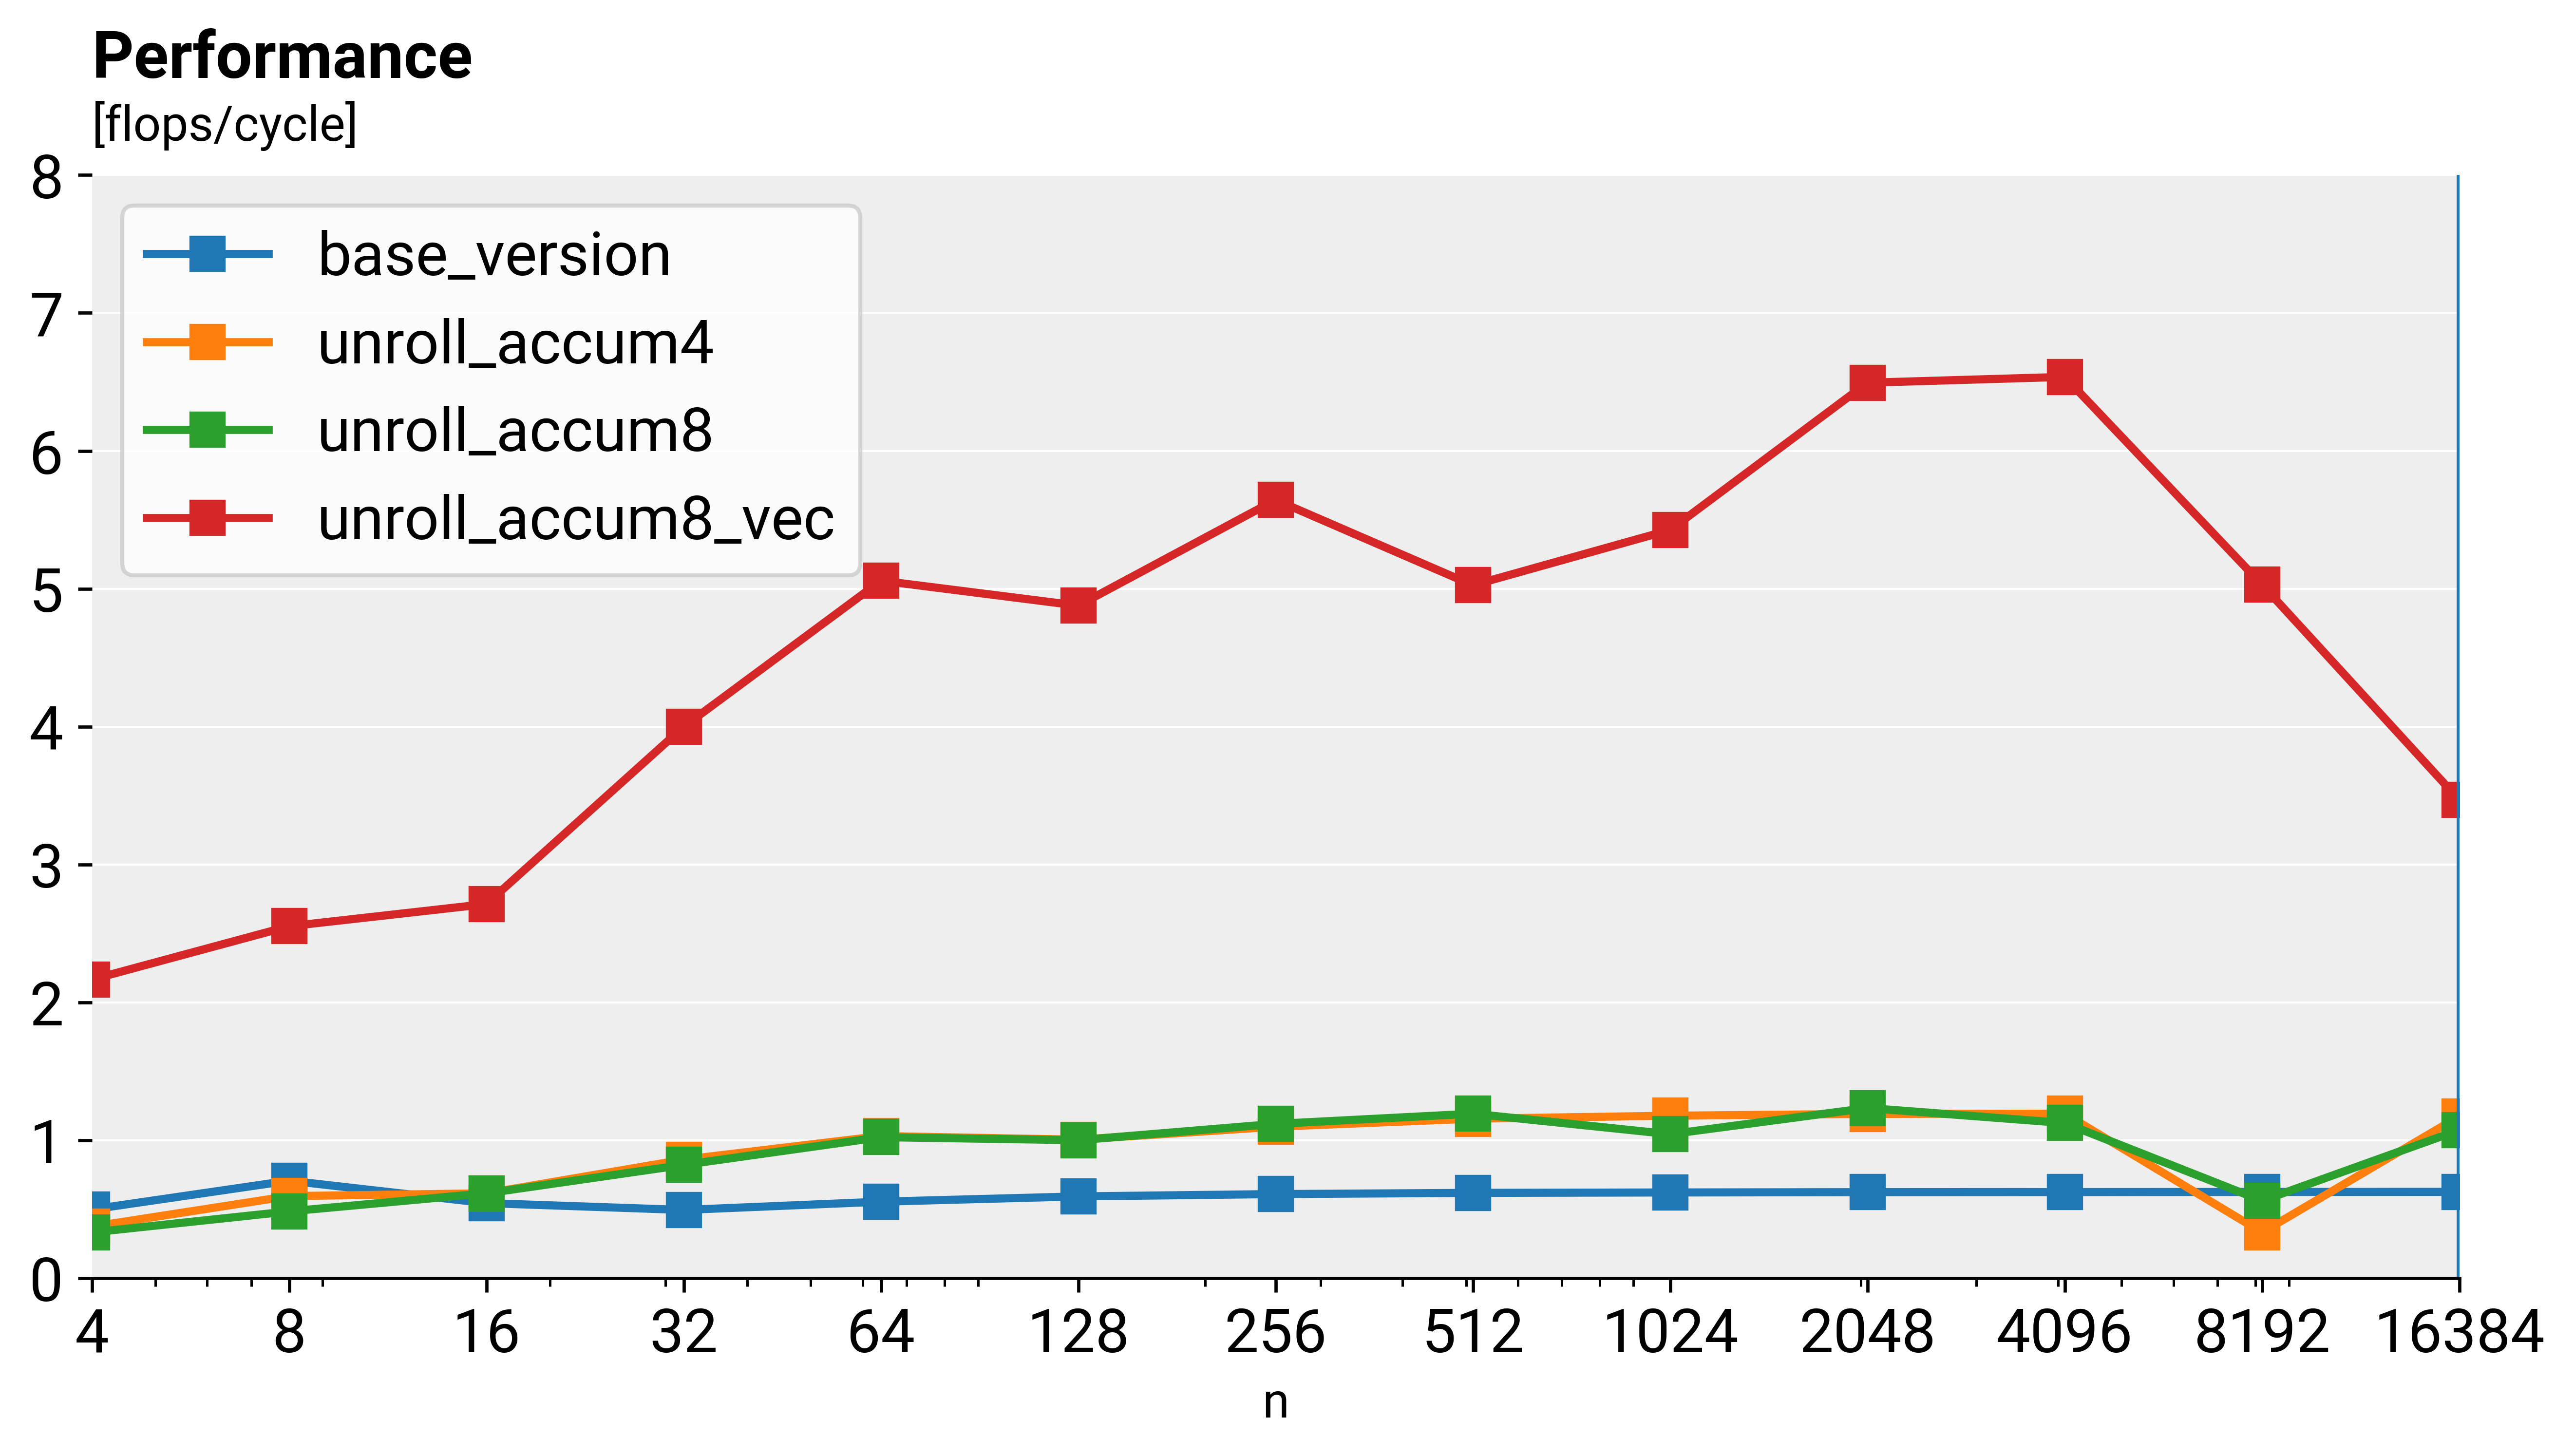

In [14]:
data = pd.read_csv("./bench3.csv")
# Extract the input size
N = data["N"].as_matrix()
# Decompose the data frame into the different functions and compute the performance
func_names = data.columns.values[1:]
perf = []
flops = {
    "base_version": 4 * N + 2,
    "unroll_accum4": 4 * N + 2,
    "unroll_accum8": 4 * N + 2,
    "unroll_accum8_vec": 4 * N + 11*8,
}

for func in func_names:
    cycles = data[func].as_matrix()
    P = flops[func] / cycles
    perf.append(P)
perf = np.array(perf)

ax = plot(N, perf, labels=func_names, ylim=8, title="Performance")
ax.set_xscale("log")
ax.set_xticks(N)
ax.set_xticklabels(N)
ax.axvline(N_cache1)
ax.axvline(N_cache2)
ax.axvline(N_cache3)
plt.show()